In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
data = pd.read_csv(r'C:\Users\quant\Projects\ML_Projects\Datasets\Supervised\Regression\gld_price_data.csv')

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
data.shape

(2290, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
data.drop(columns=['Date'],inplace = True)

In [10]:
data

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


Correlation:

1.Positive Correlation

2.Negative Correlation

In [11]:
correlation = data.corr()

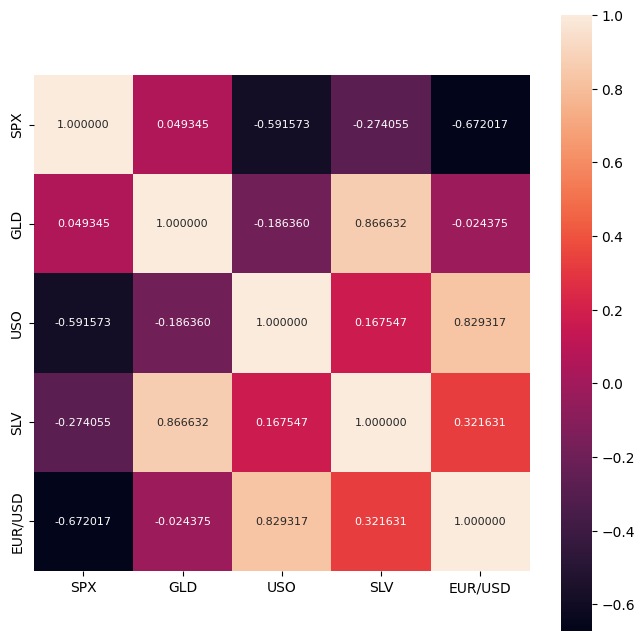

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar = True,square=True,fmt = '1f',annot = True,annot_kws={'size':8})
plt.show()

In [13]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

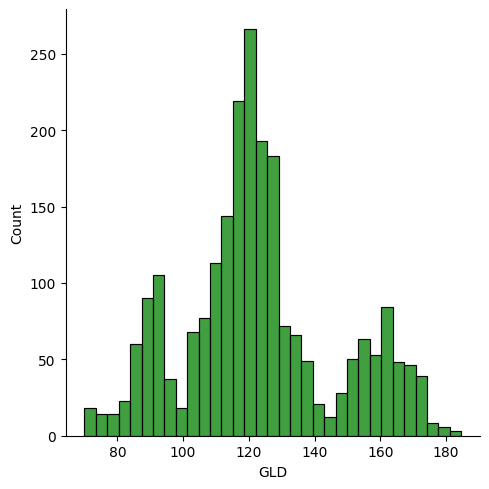

In [14]:
sns.displot(data['GLD'],color='green')

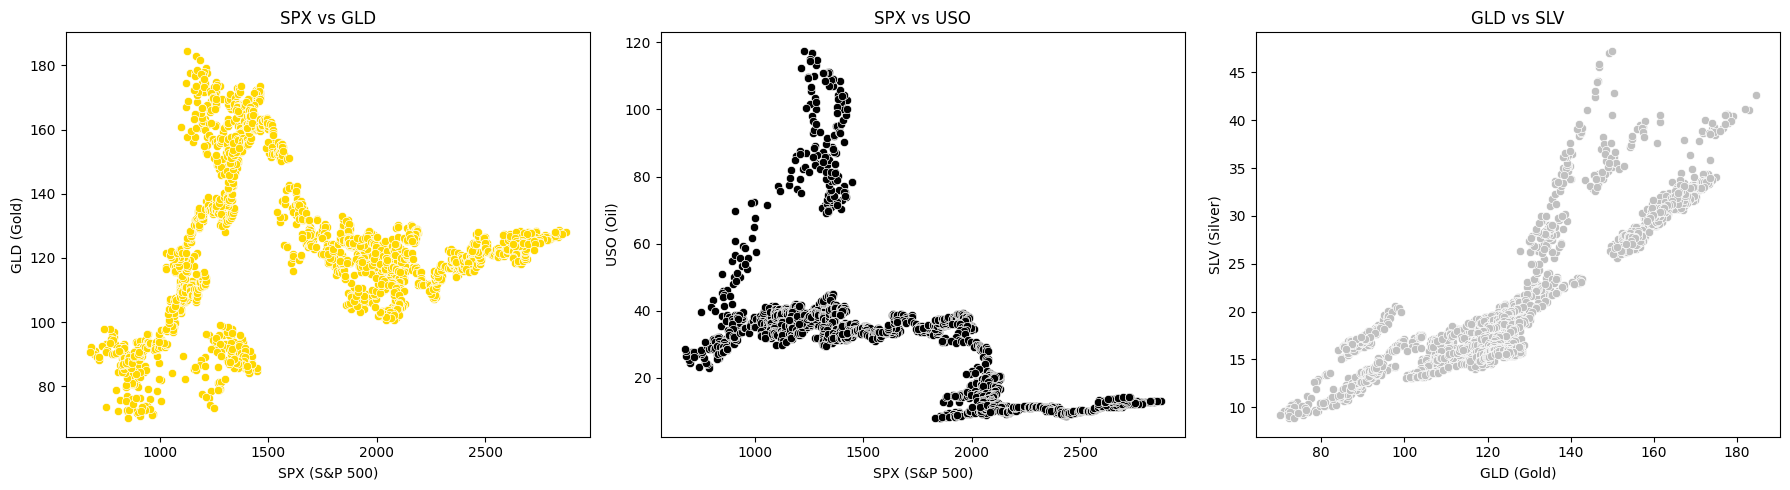

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# SPX vs GLD
sns.scatterplot(x=data['SPX'], y=data['GLD'], ax=axes[0], color='gold')
axes[0].set_title('SPX vs GLD')
axes[0].set_xlabel('SPX (S&P 500)')
axes[0].set_ylabel('GLD (Gold)')

# SPX vs USO
sns.scatterplot(x=data['SPX'], y=data['USO'], ax=axes[1], color='black')
axes[1].set_title('SPX vs USO')
axes[1].set_xlabel('SPX (S&P 500)')
axes[1].set_ylabel('USO (Oil)')

# GLD vs SLV
sns.scatterplot(x=data['GLD'], y=data['SLV'], ax=axes[2], color='silver')
axes[2].set_title('GLD vs SLV')
axes[2].set_xlabel('GLD (Gold)')
axes[2].set_ylabel('SLV (Silver)')

plt.tight_layout()
plt.show()

In [16]:
data = data.rename(columns={'EUR/USD': 'EUR_USD'})

In [17]:
Y = data['GLD']

In [18]:
data

,SPX,GLD,USO,SLV,EUR_USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [19]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [20]:
data

,SPX,GLD,USO,SLV,EUR_USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [21]:
X = data.drop(columns=['GLD'],axis = 1)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
regressor = RandomForestRegressor(n_estimators=100)
regg = SVR(kernel='linear')

In [24]:
regg.fit(x_train,y_train)

SVR(kernel='linear')

In [25]:
test_data_prediction = regg.predict(x_test)

In [26]:
test_data_prediction

array([166.93722924,  79.44519187, 111.63489273, 129.05600343,
       125.68625767, 144.95282813, 175.10726078, 125.13091657,
       114.09660117, 125.34474496, 113.71782162, 185.66695115,
       135.87404742, 166.49819654, 117.40970209, 121.28920074,
       156.78468349, 168.85883144, 158.54603195, 170.6641494 ,
       150.89234346, 119.4334625 , 191.95866602, 189.67257087,
       124.19127417,  98.35325664,  73.26397421, 121.47098262,
       114.04451789, 166.12604752,  91.29905417, 120.46215801,
        88.43695179, 112.4730278 , 112.23676588, 149.37036291,
       117.49354899, 114.73905616, 148.94294731, 111.80160789,
        99.75266746,  89.43746516, 120.89119217, 110.25452826,
       151.55205576, 121.17203439, 109.19475999, 109.23133717,
        97.98003537, 125.98181431,  74.25464352, 113.89606137,
       120.99500958, 113.01611711, 120.70200739, 117.97826825,
       158.90074932, 194.96337218, 211.29669926,  91.44810003,
       103.11733907,  87.3517482 ,  92.27400769, 118.92

In [27]:
error_score = metrics.mean_squared_error(y_test,test_data_prediction)
error_score

94.55948985822901

In [28]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,test_data_prediction))
rmse

np.float64(9.724170394343624)

In [29]:
print(y_test.min(), y_test.max())

71.709999 177.720001


In [30]:
y_test = list()

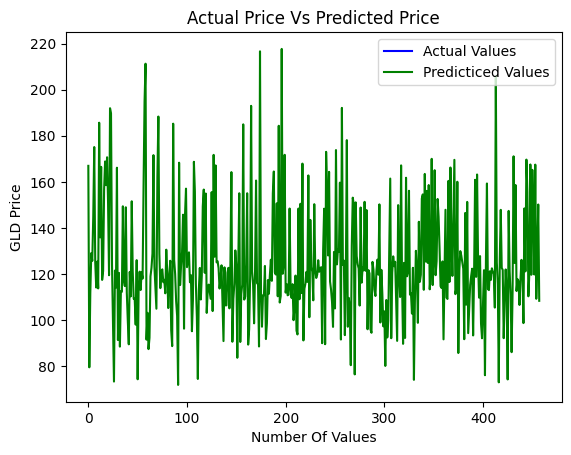

In [31]:
plt.plot(y_test, color='blue', label="Actual Values")
plt.plot(test_data_prediction,color='green', label = "Predicticed Values")
plt.title("Actual Price Vs Predicted Price")
plt.xlabel('Number Of Values')
plt.ylabel("GLD Price")
plt.legend()
plt.show()

In [32]:
import pickle as pk
with open('Gold_price.pkl','wb') as f:
    pk.dump(regg,f)

In [33]:
data['EUR_USD'].max()

np.float64(1.598798)

In [34]:
data['SPX'].min()

np.float64(676.530029)